In [1]:
!pip install -q gdown

In [2]:
import gdown

train_id = '1PBbW1I7Itdf83bH_p60vo3_jrGTS0yLM'
gdown.download(f'https://drive.google.com/uc?id={train_id}',output='train.zip',quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1PBbW1I7Itdf83bH_p60vo3_jrGTS0yLM
From (redirected): https://drive.google.com/uc?id=1PBbW1I7Itdf83bH_p60vo3_jrGTS0yLM&confirm=t&uuid=b5792315-70fa-48b0-a9b0-5e681810a6a0
To: /content/train.zip
100%|██████████| 710M/710M [00:09<00:00, 75.8MB/s]


'train.zip'

In [3]:
valid_id = '1yZYdSNYBPXOoT_QySlH2RVTQS0AySA1z'
gdown.download(f'https://drive.google.com/uc?id={valid_id}',output='valid.zip',quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1yZYdSNYBPXOoT_QySlH2RVTQS0AySA1z
From (redirected): https://drive.google.com/uc?id=1yZYdSNYBPXOoT_QySlH2RVTQS0AySA1z&confirm=t&uuid=b2fdb420-4bf3-4bdc-a086-4ef9674242a4
To: /content/valid.zip
100%|██████████| 78.4M/78.4M [00:00<00:00, 91.1MB/s]


'valid.zip'

In [4]:
test_id = '1HzZ5vgP5XsmbFCE-n8F70qlRRUtABIq6'
gdown.download(f'https://drive.google.com/uc?id={test_id}',output='test.zip',quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1HzZ5vgP5XsmbFCE-n8F70qlRRUtABIq6
From (redirected): https://drive.google.com/uc?id=1HzZ5vgP5XsmbFCE-n8F70qlRRUtABIq6&confirm=t&uuid=0e270cc5-5aaf-420f-8557-03659a66a6c6
To: /content/test.zip
100%|██████████| 56.9M/56.9M [00:00<00:00, 111MB/s]


'test.zip'

In [5]:
import zipfile

with zipfile.ZipFile('train.zip','r') as zip_ref:
  zip_ref.extractall('train_data')

In [6]:
import os
import zipfile

with zipfile.ZipFile('test.zip','r') as zip_ref:
  zip_ref.extractall('test_data')
print(os.listdir('test_data'))

['test']


In [7]:
import zipfile

with zipfile.ZipFile('valid.zip','r') as zip_ref:
  zip_ref.extractall('valid_data')
print(os.listdir('valid_data'))

['validation']


In [8]:
import os
print(os.listdir('train_data'))

['train']


In [9]:
import xml.etree.ElementTree as ET

folders = {
    "train": "train_data/train",
    "valid": "valid_data/validation",
    "test":  "test_data/test"
}

all_classes = set()
for folder_name, data_dir in folders.items():
    if not os.path.exists(data_dir):
        print(f"Directory not found: {data_dir}, skipping.")
        continue
    for file in os.listdir(data_dir):
        if file.endswith(".xml"):
            tree = ET.parse(os.path.join(data_dir, file))
            root = tree.getroot()
            for obj in root.findall('object'):
                name = obj.find('name').text.strip()
                all_classes.add(name)

all_classes = sorted(list(all_classes))
class2id = {cls: idx for idx, cls in enumerate(all_classes)}
print(class2id)


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'D': 10, 'S': 11, 'الف': 12, 'ب': 13, 'ت': 14, 'تشریفات': 15, 'ث': 16, 'ج': 17, 'د': 18, 'ز': 19, 'س': 20, 'ش': 21, 'ص': 22, 'ط': 23, 'ظ': 24, 'ع': 25, 'ف': 26, 'ق': 27, 'ل': 28, 'م': 29, 'ن': 30, 'ه': 31, 'ه\u200d': 32, 'و': 33, 'پ': 34, 'ژ (معلولین و جانبازان)': 35, 'ک': 36, 'گ': 37, 'ی': 38}


In [10]:
print(len(class2id))

39


In [11]:
import os
import xml.etree.ElementTree as ET

folders = {
    "train": "train_data/train",
    "valid": "valid_data/validation",
    "test":  "test_data/test"
}

class_counts = dict()
for folder_name, data_dir in folders.items():
    if not os.path.exists(data_dir):
        print(f"Directory not found: {data_dir}, skipping.")
        continue
    for file in os.listdir(data_dir):
        if file.endswith(".xml"):
            tree = ET.parse(os.path.join(data_dir, file))
            root = tree.getroot()
            for obj in root.findall('object'):
                name = obj.find('name').text.strip()
                class_counts[name] = class_counts.get(name, 0) + 1


for name, count in sorted(class_counts.items(), key=lambda x: x[0]):
    print(f"{name}: {count}")


0: 14620
1: 46917
2: 42577
3: 39850
4: 41150
5: 39558
6: 42232
7: 40190
8: 42536
9: 41457
D: 1101
S: 1101
الف: 1179
ب: 3257
ت: 2025
تشریفات: 1101
ث: 1106
ج: 3227
د: 3664
ز: 1103
س: 3073
ش: 1104
ص: 3571
ط: 3053
ظ: 2
ع: 1701
ف: 1102
ق: 3368
ل: 2842
م: 3294
ن: 1652
ه: 1100
ه‍: 1651
و: 3147
پ: 1107
ژ (معلولین و جانبازان): 1134
ک: 1101
گ: 1101
ی: 2623


In [12]:
print(len(class_counts))

39


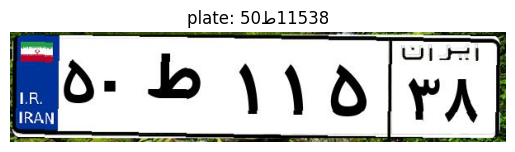

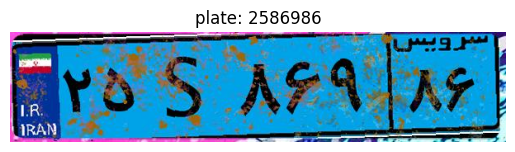

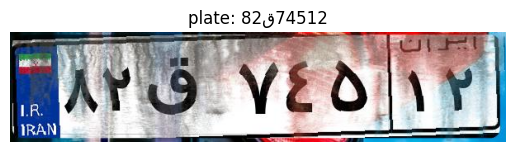

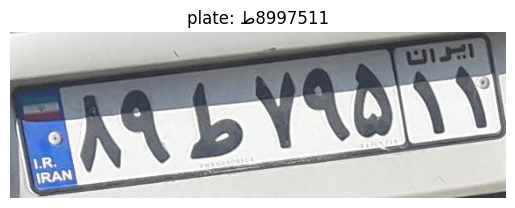

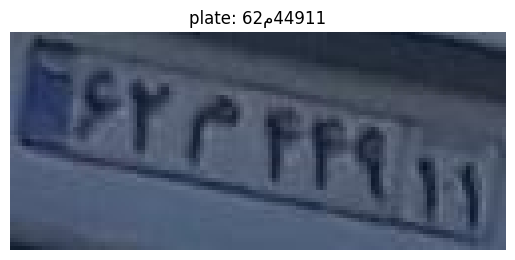

In [13]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from PIL import Image
import random

num_samples = 5
samples = []

def is_digit_or_letter(name):
    # اعداد فارسی و عربی و همچنین حروف الفبا (غیر از ارقام لاتین)
    return name.isdigit() or (len(name) == 1 and 'آ' <= name <= 'ی')

for folder_name, data_dir in folders.items():
    if not os.path.exists(data_dir):
        continue
    for file in os.listdir(data_dir):
        if file.endswith(".xml"):
            xml_path = os.path.join(data_dir, file)
            img_name = file.replace(".xml", ".jpg")
            img_path = os.path.join(data_dir, img_name)
            if not os.path.exists(img_path):
                img_name = file.replace(".xml", ".png")
                img_path = os.path.join(data_dir, img_name)
                if not os.path.exists(img_path):
                    continue  # تصویر یافت نشد

            tree = ET.parse(xml_path)
            root = tree.getroot()
            chars = []
            for obj in root.findall('object'):
                name = obj.find('name').text.strip()
                if is_digit_or_letter(name):
                    chars.append(name)
            if chars:
                plate = ''.join(chars)
                samples.append((img_path, plate))
            if len(samples) >= num_samples:
                break
    if len(samples) >= num_samples:
        break

# نمایش نمونه‌ها
for img_path, plate in random.sample(samples, min(len(samples), num_samples)):
    image = Image.open(img_path)
    plt.imshow(image)
    plt.title(f"plate: {plate}")
    plt.axis('off')
    plt.show()


In [14]:
import os
import xml.etree.ElementTree as ET
import csv

folders = {
    "train": "train_data/train",
    "valid": "valid_data/validation",
    "test":  "test_data/test"
}

def is_digit_or_letter(name):
    # اعداد فارسی و عربی و همچنین حروف الفبا (فارسی)
    return name.isdigit() or (len(name) == 1 and 'آ' <= name <= 'ی')

for folder_name, data_dir in folders.items():
    samples = []
    if not os.path.exists(data_dir):
        print(f"پوشه '{data_dir}' وجود ندارد، رد شد.")
        continue
    for file in os.listdir(data_dir):
        if file.endswith(".xml"):
            xml_path = os.path.join(data_dir, file)
            img_name = file.replace(".xml", ".jpg")
            img_path = os.path.join(data_dir, img_name)
            if not os.path.exists(img_path):
                img_name = file.replace(".xml", ".png")
                img_path = os.path.join(data_dir, img_name)
                if not os.path.exists(img_path):
                    continue  # تصویر یافت نشد

            tree = ET.parse(xml_path)
            root = tree.getroot()
            chars = []
            for obj in root.findall('object'):
                name = obj.find('name').text.strip()
                if is_digit_or_letter(name):
                    chars.append(name)
            if chars:
                plate = ''.join(chars)
                samples.append((img_path, plate))

    # ذخیره خروجی به صورت CSV برای هر پوشه
    csv_filename = f"{folder_name}_labels.csv"
    with open(csv_filename, "w", encoding="utf-8", newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["image_path", "label"])
        for img_path, label in samples:
            writer.writerow([img_path, label])
    print(f"فایل {csv_filename} با {len(samples)} ردیف ساخته شد.")

print("تمام پوشه‌ها پردازش شدند.")


فایل train_labels.csv با 45468 ردیف ساخته شد.
فایل valid_labels.csv با 5415 ردیف ساخته شد.
فایل test_labels.csv با 5602 ردیف ساخته شد.
تمام پوشه‌ها پردازش شدند.



نمونه‌هایی از پوشه train:


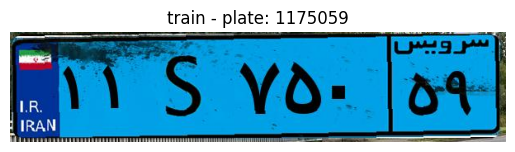

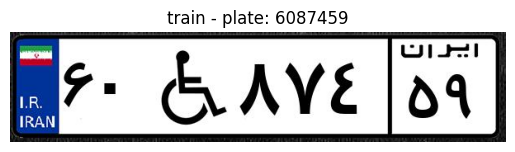

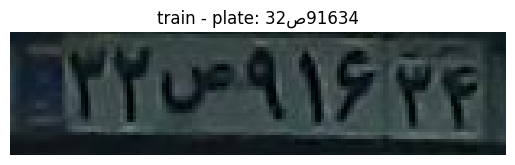


نمونه‌هایی از پوشه valid:


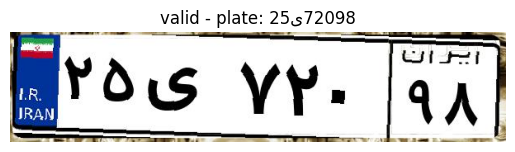

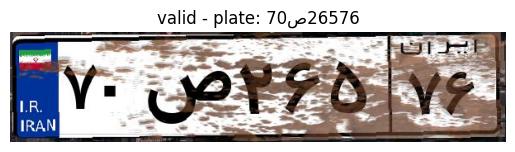

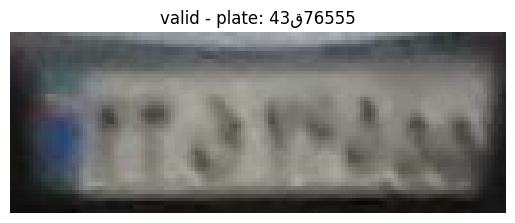


نمونه‌هایی از پوشه test:


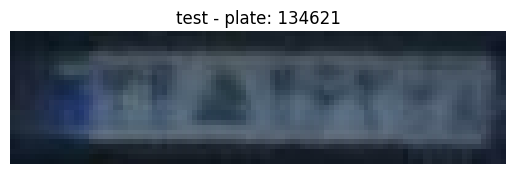

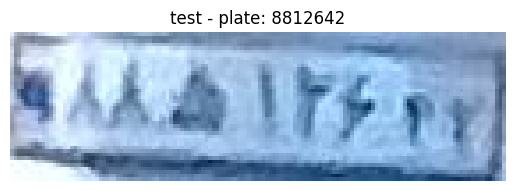

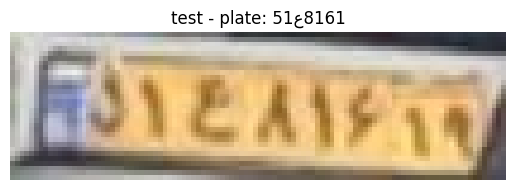

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import random

folder_csvs = {
    "train": "train_labels.csv",
    "valid": "valid_labels.csv",
    "test":  "test_labels.csv"
}

num_samples = 3  # تعداد نمونه از هر پوشه

for folder_name, csv_file in folder_csvs.items():
    if not os.path.exists(csv_file):
        print(f"فایل {csv_file} پیدا نشد.")
        continue
    print(f"\nنمونه‌هایی از پوشه {folder_name}:")
    df = pd.read_csv(csv_file)
    samples = df.sample(n=min(num_samples, len(df)), random_state=42)
    for idx, row in samples.iterrows():
        img_path = row['image_path']
        label = row['label']
        if not os.path.exists(img_path):
            print(f"عکس {img_path} وجود ندارد.")
            continue
        image = Image.open(img_path)
        plt.imshow(image)
        plt.title(f"{folder_name} - plate: {label}")
        plt.axis('off')
        plt.show()


In [16]:
import pandas as pd

folder_csvs = [
    "train_labels.csv",
    "valid_labels.csv",
    "test_labels.csv"
]

for csv_file in folder_csvs:
    if not os.path.exists(csv_file):
        print(f"{csv_file} وجود ندارد.")
        continue
    df = pd.read_csv(csv_file)
    # سطرهایی که لیبل آن‌ها بیشتر از ۸ کاراکتر است
    suspicious = df[df['label'].apply(lambda x: len(str(x)) > 8)]
    if not suspicious.empty:
        print(f"\nدر فایل {csv_file} موارد زیر لیبل طولانی دارند:")
        print(suspicious)
    else:
        print(f"{csv_file}: همه لیبل‌ها حداکثر ۸ کاراکتر هستند.")



در فایل train_labels.csv موارد زیر لیبل طولانی دارند:
                                 image_path         label
72     train_data/train/dummy_gaf_22477.jpg  33گ916395484
198    train_data/train/dummy_gaf_22455.jpg  51گ113027407
309    train_data/train/dummy_gaf_22542.jpg  69گ659645912
371    train_data/train/dummy_gaf_22130.jpg  17گ961422217
506    train_data/train/dummy_gaf_22737.jpg  43گ246781850
...                                     ...           ...
45368  train_data/train/dummy_gaf_22638.jpg  49گ727536322
45383  train_data/train/dummy_gaf_22576.jpg  23گ420727003
45391  train_data/train/dummy_gaf_22449.jpg  19گ763936059
45411  train_data/train/dummy_gaf_22885.jpg  61گ714452685
45440  train_data/train/dummy_gaf_22518.jpg  32گ235872237

[1068 rows x 2 columns]

در فایل valid_labels.csv موارد زیر لیبل طولانی دارند:
                                      image_path         label
70    valid_data/validation/dummy_gaf_102276.jpg  15گ849411108
93    valid_data/validation/dummy_gaf_10228

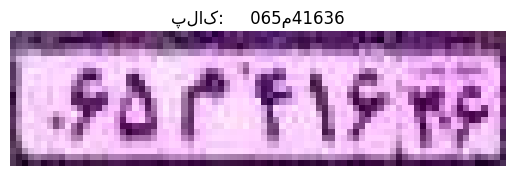

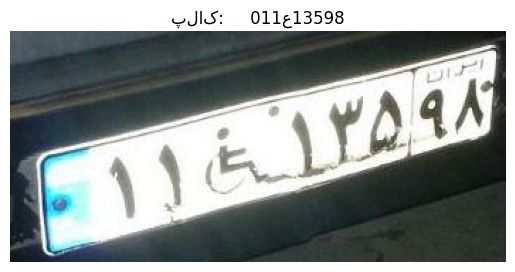

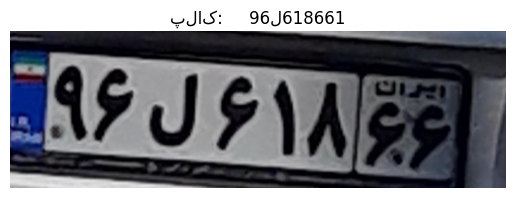

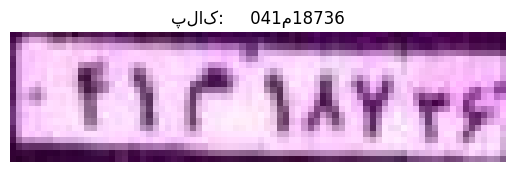

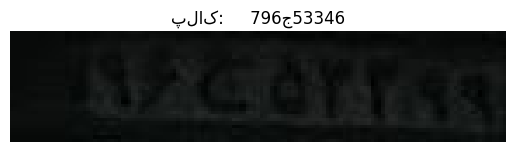

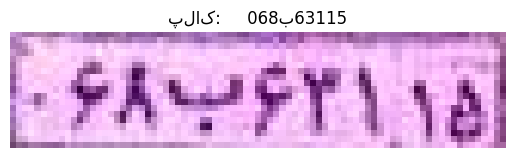

عکس    test_data/test/16.jpg وجود ندارد.


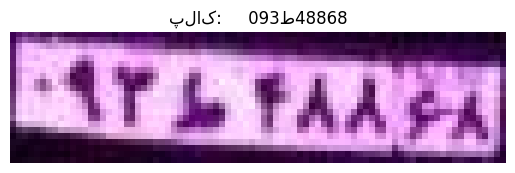

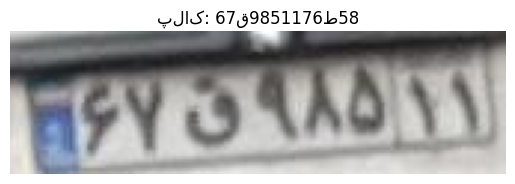

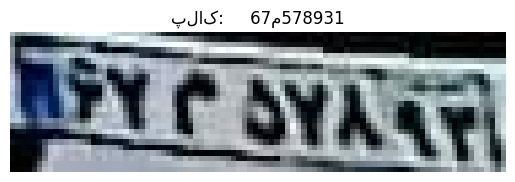

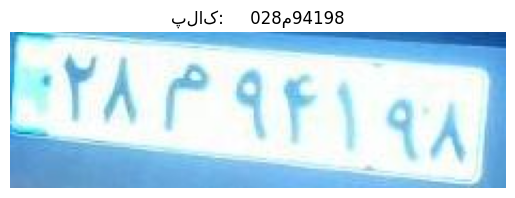

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

rows = [
 {"image_path":"test_data/test/18514.jpg",'label':'    065م41636'},
 {"image_path":"test_data/test/00422.jpg",'label':'    011ع13598'},
 {"image_path":"test_data/test/07688.jpg",'label':'    96ل618661'},
 {"image_path":"test_data/test/18534.jpg",'label':'    041م18736'},
 {"image_path":"test_data/test/14362.jpg",'label':'    796ج53346'},
 {"image_path":"test_data/test/16416.jpg",'label':'    068ب63115'},
 {"image_path":"   test_data/test/16.jpg",'label':' 11گ111119611'},
 {"image_path":"test_data/test/08278.jpg",'label':'    093ط48868'},
 {"image_path":"test_data/test/22498.jpg",'label':'67ق9851176ط58'},
 {"image_path":"test_data/test/18953.jpg",'label':'    67م578931'},
 {"image_path":"test_data/test/19334.jpg",'label':'    028م94198'}

]

for row in rows:
    img_path = row['image_path']
    label = row['label']
    if not os.path.exists(img_path):
        print(f"عکس {img_path} وجود ندارد.")
        continue
    image = Image.open(img_path)
    plt.imshow(image)
    plt.title(f"پلاک: {label}")
    plt.axis('off')
    plt.show()


In [18]:
import pandas as pd
import os

folder_csvs = [
    "train_labels.csv",
    "valid_labels.csv",
    "test_labels.csv"
]

for csv_file in folder_csvs:
    if not os.path.exists(csv_file):
        print(f"{csv_file} وجود ندارد.")
        continue
    df = pd.read_csv(csv_file)


    def remove_leading_zero(label):
        label_str = str(label)
        if label_str.startswith('0'):
            return label_str.lstrip('0')
        return label_str

    df['label'] = df['label'].apply(remove_leading_zero)


    suspicious = df[df['label'].apply(lambda x: len(str(x)) > 8)]
    if not suspicious.empty:
        print(f"\nدر فایل {csv_file} موارد زیر هنوز لیبل طولانی دارند:")
        print(suspicious)
    else:
        print(f"{csv_file}: بعد از حذف صفر ابتدا، همه لیبل‌ها حداکثر ۸ کاراکتر هستند.")


    fixed_name = csv_file.replace('.csv', '_fixed.csv')
    df.to_csv(fixed_name, index=False)
    print(f"فایل اصلاح‌شده ذخیره شد: {fixed_name} (تعداد سطرها: {len(df)})")



در فایل train_labels.csv موارد زیر هنوز لیبل طولانی دارند:
                                 image_path         label
72     train_data/train/dummy_gaf_22477.jpg  33گ916395484
198    train_data/train/dummy_gaf_22455.jpg  51گ113027407
309    train_data/train/dummy_gaf_22542.jpg  69گ659645912
371    train_data/train/dummy_gaf_22130.jpg  17گ961422217
506    train_data/train/dummy_gaf_22737.jpg  43گ246781850
...                                     ...           ...
45368  train_data/train/dummy_gaf_22638.jpg  49گ727536322
45383  train_data/train/dummy_gaf_22576.jpg  23گ420727003
45391  train_data/train/dummy_gaf_22449.jpg  19گ763936059
45411  train_data/train/dummy_gaf_22885.jpg  61گ714452685
45440  train_data/train/dummy_gaf_22518.jpg  32گ235872237

[1057 rows x 2 columns]
فایل اصلاح‌شده ذخیره شد: train_labels_fixed.csv (تعداد سطرها: 45468)

در فایل valid_labels.csv موارد زیر هنوز لیبل طولانی دارند:
                                      image_path         label
70    valid_data/validation

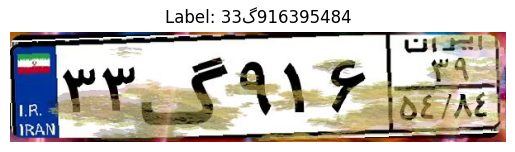

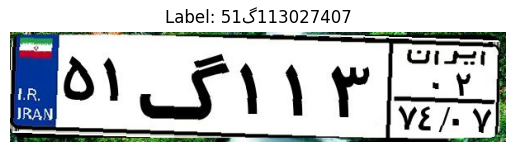

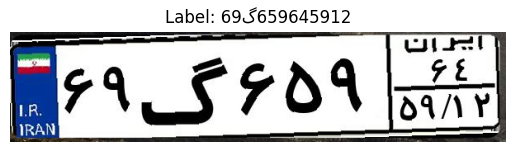

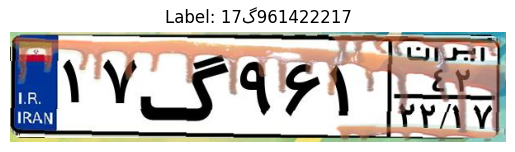

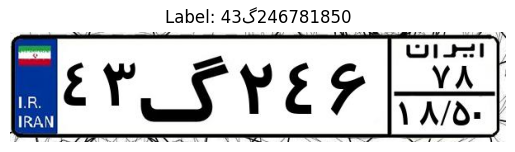

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

csv_file = 'train_labels.csv'
df = pd.read_csv(csv_file)

def remove_leading_zero(label):
    label_str = str(label)
    if label_str.startswith('0'):
        return label_str.lstrip('0')
    return label_str

df['label'] = df['label'].apply(remove_leading_zero)
suspicious = df[df['label'].apply(lambda x: len(str(x)) > 8)]

# نمایش ۵ مورد اول
for idx, row in suspicious.head(5).iterrows():
    image_path = row['image_path']
    label = row['label']
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()
    else:
        print(f"تصویر {image_path} وجود ندارد. لیبل: {label}")


In [20]:
import pandas as pd
import os

folder_csvs = [
    "train_labels.csv",
    "valid_labels.csv",
    "test_labels.csv"
]

total_count = 0

for csv_file in folder_csvs:
    if not os.path.exists(csv_file):
        print(f"{csv_file} وجود ندارد.")
        continue
    df = pd.read_csv(csv_file)
    count_12 = df[df['label'].apply(lambda x: len(str(x)) == 12)].shape[0]
    print(f"{csv_file}: تعداد لیبل‌های ۱۲ کاراکتری = {count_12}")
    total_count += count_12

print(f"\nمجموع کل سطرهایی که لیبل ۱۲ کاراکتری دارند: {total_count}")


train_labels.csv: تعداد لیبل‌های ۱۲ کاراکتری = 1002
valid_labels.csv: تعداد لیبل‌های ۱۲ کاراکتری = 100
test_labels.csv: تعداد لیبل‌های ۱۲ کاراکتری = 1

مجموع کل سطرهایی که لیبل ۱۲ کاراکتری دارند: 1103


In [21]:
plate_chr = ['0','1','2','3','4','5','6','7','8','9',
             'D','S','الف','ب','ت','تشریفات','ث','ج','د','ز','س','ش',
             'ص','ط','ظ','ع','ف','ق','ل','م','ن','ه','و','پ','ک','گ','ی', 'ژ (معلولین و جانبازان)','ه‍']

char2idx = {c: i for i, c in enumerate(plate_chr)}


In [22]:
with open("plate_charset.txt", "w", encoding="utf-8") as f:
    for ch in plate_chr:
        f.write(str(ch) + "\n")


In [23]:
# import pandas as pd

# for split in ["train", "valid", "test"]:
#     df = pd.read_csv(f"{split}_labels_fixed.csv")
#     lines = []
#     for idx, row in df.iterrows():
#         img_path = row['image_path']
#         label = str(row['label']).strip()

#         label = label.replace(" ", "")
#         try:
#             label_ids = [str(char2idx[ch]) for ch in label if ch in char2idx]
#             if len(label_ids) == len(label):
#                 lines.append(f"{img_path} {' '.join(label_ids)}")
#             else:
#                 print(f"خطا در {img_path}: کاراکتر ناشناخته")
#         except Exception as e:
#             print(f"Error in {img_path}: {e}")

#     with open(f"{split}.txt", "w", encoding="utf-8") as f:
#         for line in lines:
#             f.write(line + '\n')
#     print(f"{split}.txt آماده شد ({len(lines)} نمونه)")


In [24]:
import pandas as pd

for split in ["train", "valid", "test"]:
    df = pd.read_csv(f"{split}_labels_fixed.csv")
    lines = []
    for idx, row in df.iterrows():
        img_path = row['image_path']
        label = str(row['label']).strip()
        label = label.replace(" ", "")
        # چک کاراکترهای ناشناخته:
        unknown = [ch for ch in label if ch not in char2idx]
        if len(unknown) > 0:
            print(f"کاراکتر ناشناخته {unknown} در {img_path}")
            continue
        lines.append(f"{img_path} {label}")

    with open(f"{split}.txt", "w", encoding="utf-8") as f:
        for line in lines:
            f.write(line + '\n')
    print(f"{split}.txt آماده شد ({len(lines)} نمونه)")


train.txt آماده شد (45468 نمونه)
valid.txt آماده شد (5415 نمونه)
test.txt آماده شد (5602 نمونه)


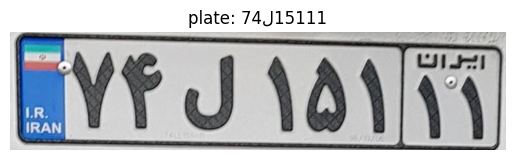

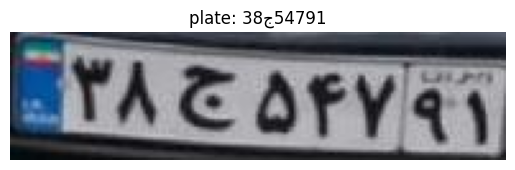

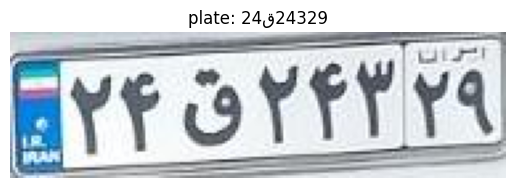

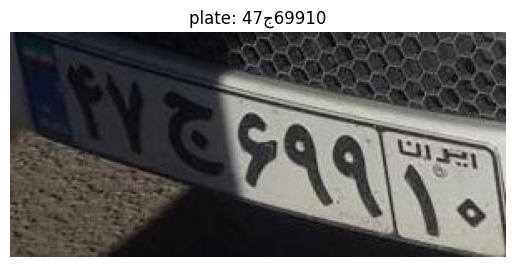

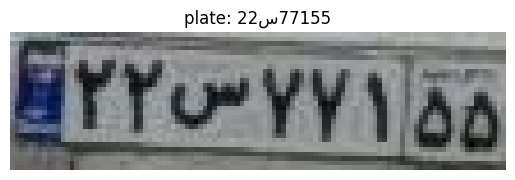

In [25]:
import matplotlib.pyplot as plt
from PIL import Image

txt_file = 'test.txt'

# خواندن نمونه‌ها
with open(txt_file, encoding='utf-8') as f:
    lines = f.readlines()

import random
samples = random.sample(lines, min(5, len(lines)))

for line in samples:
    line = line.strip()
    if not line:
        continue
    try:
        img_path, label = line.split(' ', 1)
        image = Image.open(img_path)
        plt.imshow(image)
        plt.title(f'plate: {label}')
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"خطا در خواندن {line}: {e}")


In [26]:
with open('plate_charset.txt', encoding='utf-8') as f:
    for idx, line in enumerate(f):
        print(f"{idx}: {line.strip()}")


0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: D
11: S
12: الف
13: ب
14: ت
15: تشریفات
16: ث
17: ج
18: د
19: ز
20: س
21: ش
22: ص
23: ط
24: ظ
25: ع
26: ف
27: ق
28: ل
29: م
30: ن
31: ه
32: و
33: پ
34: ک
35: گ
36: ی
37: ژ (معلولین و جانبازان)
38: ه‍


In [27]:
with open('plate_charset.txt', encoding='utf-8') as f:
    charset = set(line.strip() for line in f if line.strip())

csv_files = ['train_labels_fixed.csv', 'valid_labels_fixed.csv', 'test_labels_fixed.csv']
import pandas as pd

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    for idx, label in enumerate(df['label']):
        for ch in str(label):
            if ch not in charset:
                print(f"کاراکتر ناشناخته '{ch}' در لیبل '{label}' سطر {idx} فایل {csv_file}")


بزرگترین تصویر: train_data/train/01911.jpg  (عرض: 2046 ، ارتفاع: 1509)


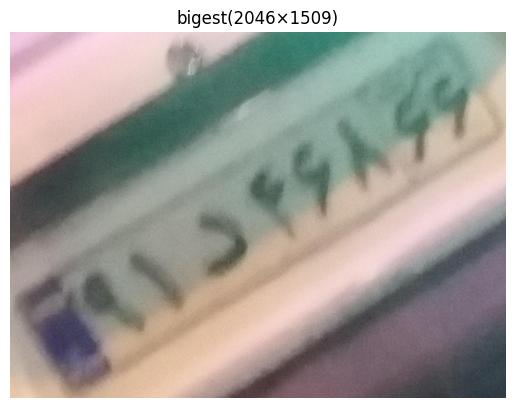

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

max_w, max_h = 0, 0
max_img_path = ""

for txt in ['train.txt', 'valid.txt', 'test.txt']:
    with open(txt, encoding='utf-8') as f:
        for line in f:
            img_path = line.strip().split(' ', 1)[0]
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    if w * h > max_w * max_h:
                        max_w, max_h = w, h
                        max_img_path = img_path
            except Exception as e:
                print(f'خطا در خواندن {img_path}: {e}')

print(f'بزرگترین تصویر: {max_img_path}  (عرض: {max_w} ، ارتفاع: {max_h})')

# نمایش بزرگترین تصویر
if max_img_path:
    img = Image.open(max_img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'bigest({max_w}×{max_h})')
    plt.axis('off')
    plt.show()


              width        height
count  56485.000000  56485.000000
mean     482.373816    125.414694
std      263.525576     80.805788
min       32.000000      9.000000
25%      271.000000     82.000000
50%      601.000000    133.000000
75%      601.000000    133.000000
max     3592.000000   1539.000000


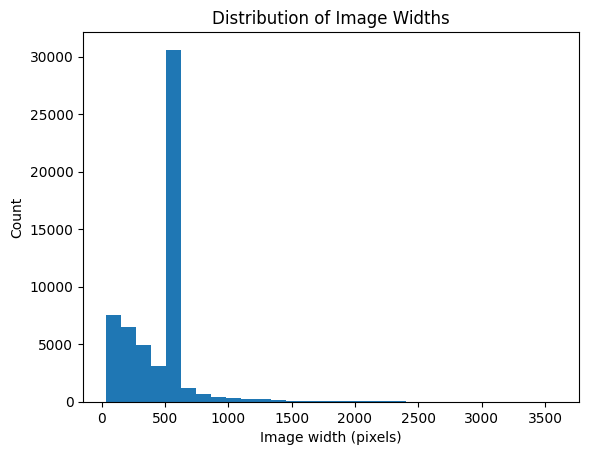

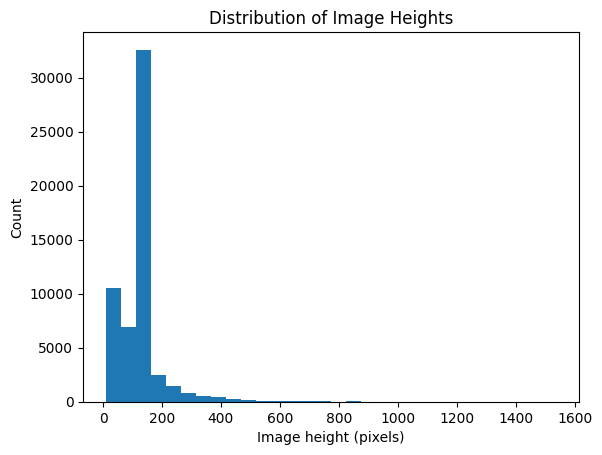

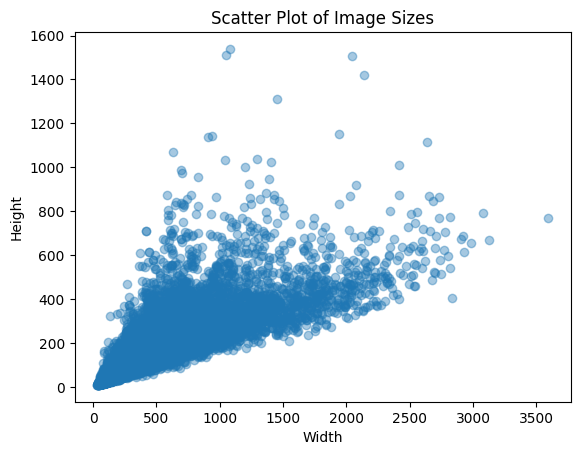

In [29]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

widths = []
heights = []

for txt in ['train.txt', 'valid.txt', 'test.txt']:
    with open(txt, encoding='utf-8') as f:
        for line in f:
            img_path = line.strip().split(' ', 1)[0]
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
            except Exception as e:
                print(f'Error reading {img_path}: {e}')

df = pd.DataFrame({'width': widths, 'height': heights})

# Show summary statistics
print(df.describe())

# Histogram of image widths
plt.figure()
plt.hist(df['width'], bins=30)
plt.xlabel('Image width (pixels)')
plt.ylabel('Count')
plt.title('Distribution of Image Widths')
plt.show()

# Histogram of image heights
plt.figure()
plt.hist(df['height'], bins=30)
plt.xlabel('Image height (pixels)')
plt.ylabel('Count')
plt.title('Distribution of Image Heights')
plt.show()

# Scatter plot of width vs. height
plt.figure()
plt.scatter(df['width'], df['height'], alpha=0.4)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Sizes')
plt.show()


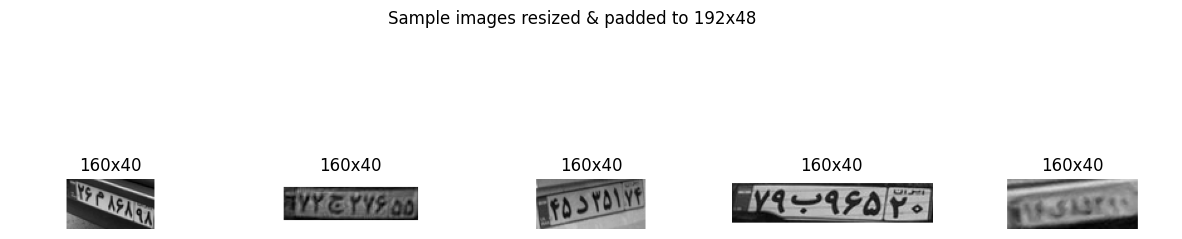

In [30]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import random

target_size = (160, 40)  # (width, height)

# جمع‌آوری لیست همه تصاویر دیتاست
img_paths = []
for txt in ['train.txt', 'valid.txt', 'test.txt']:
    with open(txt, encoding='utf-8') as f:
        for line in f:
            img_path = line.strip().split(' ', 1)[0]
            img_paths.append(img_path)

# انتخاب چند تصویر تصادفی
sample_imgs = random.sample(img_paths, 5)  # عدد ۵ رو به هر تعداد که خواستی می‌تونی تغییر بدی

def resize_and_pad(img, target_size=(192,48)):
    img = img.convert('L')
    img.thumbnail(target_size, Image.LANCZOS)
    pad_w = target_size[0] - img.size[0]
    pad_h = target_size[1] - img.size[1]
    padding = (pad_w//2, pad_h//2, pad_w - pad_w//2, pad_h - pad_h//2)
    img = ImageOps.expand(img, padding, fill=255)  # با سفید پد می‌کند
    return img

plt.figure(figsize=(15, 4))
for i, img_path in enumerate(sample_imgs):
    try:
        img = Image.open(img_path)
        img_resized = resize_and_pad(img, target_size)
        plt.subplot(1, 5, i+1)
        plt.imshow(img_resized, cmap='gray')
        plt.title(f"{img_resized.size[0]}x{img_resized.size[1]}")
        plt.axis('off')
    except Exception as e:
        print(f"Error opening {img_path}: {e}")

plt.suptitle('Sample images resized & padded to 192x48')
plt.show()


In [31]:
from PIL import Image, ImageOps
import os

def resize_and_pad(img, target_size=(160, 40)):
    img = img.convert('L')  # Grayscale
    img.thumbnail(target_size, Image.LANCZOS)  # Keep aspect ratio, fit inside target
    pad_w = target_size[0] - img.size[0]
    pad_h = target_size[1] - img.size[1]
    padding = (pad_w // 2, pad_h // 2, pad_w - pad_w // 2, pad_h - pad_h // 2)
    img = ImageOps.expand(img, padding, fill=255)  # Padding with white
    return img

all_txt = ['train.txt', 'valid.txt', 'test.txt']

for txt in all_txt:
    with open(txt, encoding='utf-8') as f:
        for line in f:
            img_path = line.strip().split(' ', 1)[0]
            if os.path.exists(img_path):
                try:
                    img = Image.open(img_path)
                    img_fixed = resize_and_pad(img, (160, 40))
                    img_fixed.save(img_path)  # Overwrite original
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")


In [32]:
import numpy as np
def prepare_dataset(txt_file, img_size=(160,40), max_label_length=12):
    X = []
    y = []
    input_lengths = []
    label_lengths = []
    skipped = 0
    with open(txt_file, encoding='utf-8') as f:
        for line_num, line in enumerate(f, 1):
            try:
                img_path, label = line.strip().split(' ', 1)
                lbl = text_to_labels(label)
                if len(lbl) == 0:
                    print(f"[WARN] Empty label at line {line_num} in {txt_file}: '{label}' — Skipped.")
                    skipped += 1
                    continue
                if len(lbl) > max_label_length:
                    print(f"[WARN] Label too long (len={len(lbl)}) at line {line_num} in {txt_file}: '{label}' — Skipped.")
                    skipped += 1
                    continue
                img = Image.open(img_path).convert('L').resize(img_size)
                img = np.array(img, dtype=np.float32) / 255.0
                X.append(np.expand_dims(img, -1))  # shape: (h, w, 1)
                padded_lbl = lbl + [blank_token] * (max_label_length - len(lbl))
                y.append(padded_lbl)
                input_lengths.append(img_size[0] // 4)
                label_lengths.append(len(lbl))
            except Exception as e:
                print(f"[ERROR] at line {line_num} in {txt_file}: {e}")
                skipped += 1
                continue
    X = np.array(X)
    y = np.array(y)
    input_lengths = np.array(input_lengths).reshape(-1, 1)
    label_lengths = np.array(label_lengths).reshape(-1, 1)
    print(f"Loaded {len(X)} samples from {txt_file}, skipped {skipped} samples.")
    return X, y, input_lengths, label_lengths

X_train, y_train, input_len_train, label_len_train = prepare_dataset('train.txt', img_size=(160,40), max_label_length=12)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)


[ERROR] at line 1 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 2 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 3 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 4 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 5 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 6 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 7 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 8 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 9 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 10 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 11 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 12 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 13 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 14 in train.txt: name 'text_to_labels' is not defined
[ERROR] at line 15 in train.t

In [33]:
max_label_length = 12  # Adjust as needed

txt_files = ['train.txt', 'valid.txt', 'test.txt']

for txt_file in txt_files:
    output_file = txt_file.replace('.txt', '_fixed.txt')
    skipped = 0
    kept = 0
    with open(txt_file, encoding='utf-8') as fin, open(output_file, 'w', encoding='utf-8') as fout:
        for line_num, line in enumerate(fin, 1):
            try:
                img_path, label = line.strip().split(' ', 1)
                if len(label) > max_label_length:
                    print(f"[WARN] {txt_file} | Line {line_num} | Label too long ({len(label)}): '{label}' — Removed.")
                    skipped += 1
                    continue
                if len(label) == 0:
                    print(f"[WARN] {txt_file} | Line {line_num} | Empty label — Removed.")
                    skipped += 1
                    continue
                fout.write(f"{img_path} {label}\n")
                kept += 1
            except Exception as e:
                print(f"[ERROR] {txt_file} | Line {line_num} | {e}")
                skipped += 1
    print(f"\n{txt_file}: {kept} samples kept, {skipped} samples removed. Output: {output_file}\n")


[WARN] train.txt | Line 3882 | Label too long (13): '67ق9851176ط58' — Removed.
[WARN] train.txt | Line 23104 | Label too long (16): '71بط171111819719' — Removed.
[WARN] train.txt | Line 30732 | Label too long (16): '71ب1171111181119' — Removed.
[WARN] train.txt | Line 32121 | Label too long (15): '41و6123652ص4961' — Removed.
[WARN] train.txt | Line 40929 | Label too long (16): '13ت8881148د29977' — Removed.
[WARN] train.txt | Line 41848 | Label too long (15): '41و6123652ص4961' — Removed.

train.txt: 45462 samples kept, 6 samples removed. Output: train_fixed.txt

[WARN] valid.txt | Line 690 | Label too long (16): '13ت8881148د29977' — Removed.
[WARN] valid.txt | Line 3679 | Label too long (16): '71بط171111819719' — Removed.

valid.txt: 5413 samples kept, 2 samples removed. Output: valid_fixed.txt

[WARN] test.txt | Line 5160 | Label too long (13): '67ق9851176ط58' — Removed.

test.txt: 5601 samples kept, 1 samples removed. Output: test_fixed.txt



In [34]:
import numpy as np
from PIL import Image

# Load charset
with open('plate_charset.txt', encoding='utf-8') as f:
    charset = [line.strip() for line in f if line.strip()]
char2idx = {c: i for i, c in enumerate(charset)}
blank_token = len(charset)  # CTC blank token index

# Set this to max length of your plates (for Iranian plates often 8)
max_label_length = 12
img_size = (160, 40)

def text_to_labels(text):
    return [char2idx[c] for c in text]

def prepare_dataset(txt_file, img_size=(160,40), max_label_length=8):
    X = []
    y = []
    input_lengths = []
    label_lengths = []
    with open(txt_file, encoding='utf-8') as f:
        for line in f:
            img_path, label = line.strip().split(' ', 1)
            img = Image.open(img_path).convert('L').resize(img_size)
            img = np.array(img, dtype=np.float32) / 255.0
            X.append(np.expand_dims(img, -1))  # shape: (h, w, 1)
            lbl = text_to_labels(label)
            padded_lbl = lbl + [blank_token] * (max_label_length - len(lbl))
            y.append(padded_lbl)
            input_lengths.append(img_size[0] // 8)  # usually time steps after CNN
            label_lengths.append(len(lbl))
    X = np.array(X)
    y = np.array(y)
    input_lengths = np.array(input_lengths).reshape(-1, 1)
    label_lengths = np.array(label_lengths).reshape(-1, 1)
    return X, y, input_lengths, label_lengths

# Example usage:
X_train, y_train, input_len_train, label_len_train = prepare_dataset('train_fixed.txt', img_size, max_label_length)
X_valid, y_valid, input_len_valid, label_len_valid = prepare_dataset('valid_fixed.txt', img_size, max_label_length)
X_test, y_test, input_len_test, label_len_test = prepare_dataset('test_fixed.txt', img_size, max_label_length)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("input_len_train shape:", input_len_train.shape)
print("label_len_train shape:", label_len_train.shape)


X_train shape: (45462, 40, 160, 1)
y_train shape: (45462, 12)
input_len_train shape: (45462, 1)
label_len_train shape: (45462, 1)


In [35]:
print(np.unique(input_len_train))
print(np.unique(label_len_train))


[20]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


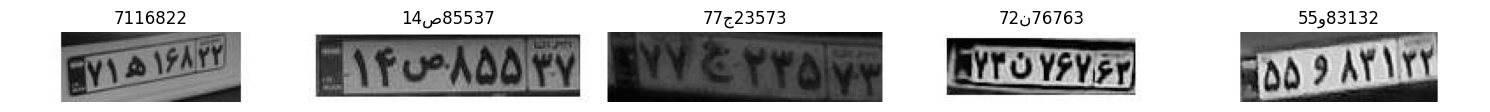

In [36]:
import matplotlib.pyplot as plt


with open('plate_charset.txt', encoding='utf-8') as f:
    charset = [line.strip() for line in f if line.strip()]
blank_token = len(charset)

def labels_to_text(label_idxs):

    return ''.join([charset[i] for i in label_idxs if i != blank_token])


import numpy as np
idxs = np.random.choice(X_test.shape[0], 5, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(idxs):
    plt.subplot(1, 5, i+1)
    img = X_test[idx].squeeze()
    label_idx = y_test[idx]
    label_text = labels_to_text(label_idx)
    plt.imshow(img, cmap='gray')
    plt.title(label_text, fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [37]:
from tensorflow.keras import layers, models, backend as K
import tensorflow as tf


img_h, img_w = 40, 160
n_classes = len(charset) + 1

input_img = layers.Input(shape=(img_h, img_w, 1), name='input_img')
labels = layers.Input(name='labels', shape=(None,), dtype='int32')
input_length = layers.Input(name='input_length', shape=(1,), dtype='int32')
label_length = layers.Input(name='label_length', shape=(1,), dtype='int32')


x = input_img
for filters in [64, 128, 256]:
    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.Dropout(0.25)(x)
# print(x.shape)
conv_shape = x.shape
x = layers.Permute((2, 1, 3))(x)
x = layers.Reshape(target_shape=(20, 5*256))(x)






x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)

y_pred = layers.Dense(n_classes, activation='softmax', name='y_pred')(x)

def ctc_lambda(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = layers.Lambda(ctc_lambda, output_shape=(1,), name='ctc')(
    [y_pred, labels, input_length, label_length]
)

model = models.Model(inputs=[input_img, labels, input_length, label_length], outputs=loss_out)
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model.compile(optimizer='adam', loss={'ctc': lambda y_true, y_pred: y_pred})

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 40, 160,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 40, 160,   │        640 │ input_img[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 40, 160,   │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 20, 80,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 20, 80,    │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 20, 80,    │     73,856 │ dropout[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 80,    │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 10, 40,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 10, 40,    │          0 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 10, 40,    │    295,168 │ dropout_1[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 40,    │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 5, 20,     │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 5, 20,     │          0 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 20, 5,     │          0 │ dropout_2[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 20, 1280)  │          0 │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 20, 512)   │  3,147,776 │ reshape[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 20, 256)   │    656,384 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                 

 Total params: 4,345,128 (16.58 MB)

 Trainable params: 4,344,232 (16.57 MB)

 Non-trainable params: 896 (3.50 KB)

In [38]:
history = model.fit(
    x={
        'input_img': X_train,
        'labels': y_train,
        'input_length': input_len_train,
        'label_length': label_len_train
    },
    y=np.zeros(len(X_train)),
    batch_size=32,
    epochs=50,
    validation_data=(
        {
            'input_img': X_valid,
            'labels': y_valid,
            'input_length': input_len_valid,
            'label_length': label_len_valid
        },
        np.zeros(len(X_valid))
    ),

    callbacks=[early_stop, reduce_lr]

)


Epoch 1/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 108s 68ms/step - loss: 17.5215 - val_loss: 2.9599 - learning_rate: 0.0010
Epoch 2/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 95s 67ms/step - loss: 2.5618 - val_loss: 2.2989 - learning_rate: 0.0010
Epoch 3/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 96s 68ms/step - loss: 2.0743 - val_loss: 2.1499 - learning_rate: 0.0010
Epoch 4/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 140s 66ms/step - loss: 1.8409 - val_loss: 1.9473 - learning_rate: 0.0010
Epoch 5/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - loss: 1.6732 - val_loss: 1.8595 - learning_rate: 0.0010
Epoch 6/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - loss: 1.5626 - val_loss: 1.8096 - learning_rate: 0.0010
Epoch 7/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - loss: 1.4212 - val_loss: 1.9648 - learning_rate: 0.0010
Epoch 8/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 94s 66ms/step - loss: 1.3420 - val_loss: 1.6487 - learning_rate: 0.0010
Epoch 9/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - loss: 1.3041 - val_loss

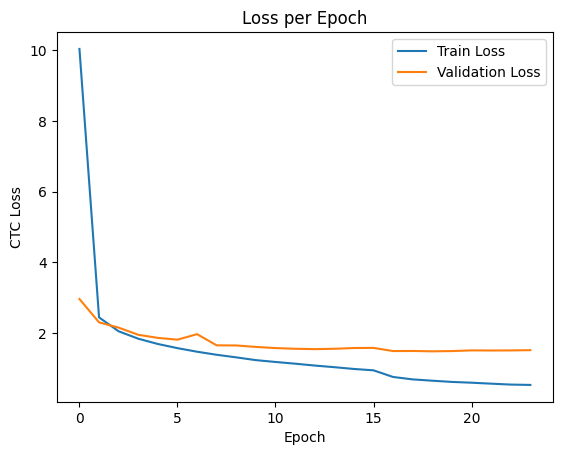

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('CTC Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()


In [40]:

prediction_model = models.Model(inputs=input_img, outputs=y_pred)


In [41]:
import numpy as np
from tensorflow.keras import backend as K

def labels_to_text(label_idxs, charset):
    return ''.join([charset[i] for i in label_idxs if i != len(charset)])

def ctc_decode_batch(y_preds, charset):

    out = K.ctc_decode(
        y_preds,
        input_length=np.ones(y_preds.shape[0]) * y_preds.shape[1],
        greedy=True
    )[0][0]
    out = K.get_value(out)
    return [labels_to_text(label, charset) for label in out]


y_preds = prediction_model.predict(X_test, batch_size=32)
decoded_texts = ctc_decode_batch(y_preds, charset)
true_texts = [labels_to_text(label, charset) for label in y_test]


176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


In [42]:
test_loss = model.evaluate(
    x={
        'input_img': X_test,
        'labels': y_test,
        'input_length': input_len_test,
        'label_length': label_len_test
    },
    y=np.zeros(len(X_test)),
    batch_size=32
)
print("Test CTC Loss:", test_loss)


176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 2.7561
Test CTC Loss: 2.7496039867401123


In [43]:
char_total = 0
char_correct = 0
for pred, true in zip(decoded_texts, true_texts):
    n = min(len(pred), len(true))
    char_total += n
    char_correct += sum(p == t for p, t in zip(pred, true))
char_acc = char_correct / char_total

plate_acc = np.mean([p == t for p, t in zip(decoded_texts, true_texts)])

print(f'Character accuracy: {char_acc*100:.2f}%')
print(f'Plate (full) accuracy: {plate_acc*100:.2f}%')


Character accuracy: 87.93%
Plate (full) accuracy: 0.00%


In [44]:
for i in range(10):
    print(f'Pred: {decoded_texts[i]} | True: {true_texts[i]}')


Pred: 42ص56577ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 42س56577
Pred: 13ع35244ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 12ع25244
Pred: 82ب82266ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 82ب82266
Pred: 55ل98110ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 55ل98110
Pred: 11م39944ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 91م39944
Pred: 44ن49972ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 44ن49924
Pred: 49ل7799ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 49ل77799
Pred: 4طه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 41ط61
Pred: 78ط63318ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 78ط63318
Pred: 47ب56522ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ه‍ | True: 47ب56522


In [45]:
print(decoded_texts[:5])
print(true_texts[:5])


['42ص56577ه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200d', '13ع35244ه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200d', '82ب82266ه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200d', '55ل98110ه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200d', '11م39944ه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200dه\u200d']
['42س56577', '12ع25244', '82ب82266', '55ل98110', '91م39944']


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


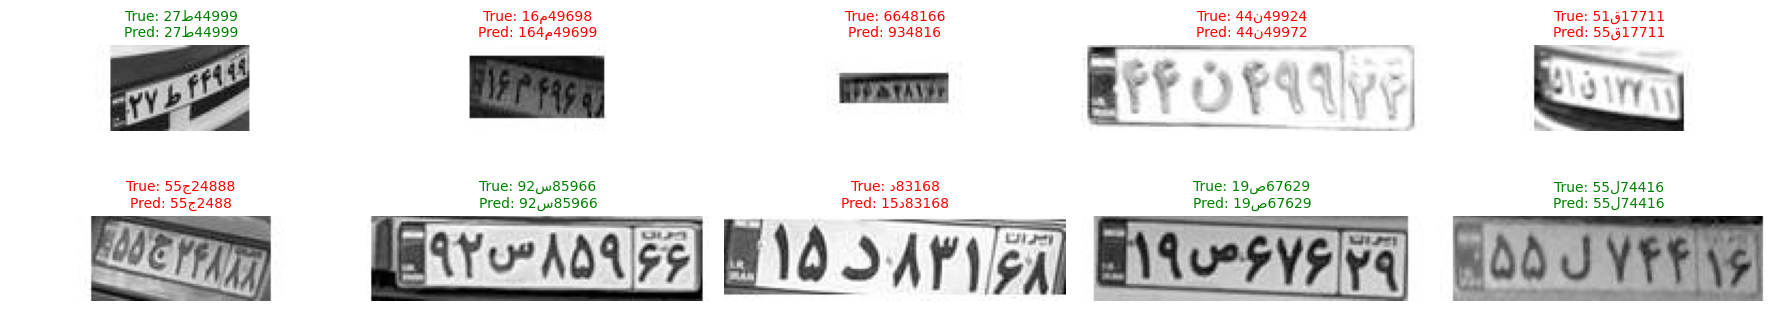

In [46]:
import matplotlib.pyplot as plt
import numpy as np



def labels_to_text(label_idxs, charset):
    result = []
    for i in label_idxs:
        if i == len(charset) or i == -1 or i >= len(charset):
            break
        result.append(charset[i])
    return ''.join(result)


def ctc_decode_batch(y_preds, charset):
    out = K.ctc_decode(
        y_preds,
        input_length=np.ones(y_preds.shape[0]) * y_preds.shape[1],
        greedy=True
    )[0][0]
    out = K.get_value(out)
    return [labels_to_text(label, charset) for label in out]


y_preds = prediction_model.predict(X_test, batch_size=32)
decoded_texts = ctc_decode_batch(y_preds, charset)
true_texts = [labels_to_text(label, charset) for label in y_test]


n = 10
idxs = np.random.choice(X_test.shape[0], n, replace=False)

plt.figure(figsize=(18, 4))
for i, idx in enumerate(idxs):
    plt.subplot(2, n//2, i+1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(
        f"True: {true_texts[idx]}\nPred: {decoded_texts[idx]}",
        fontsize=10, color='green' if true_texts[idx]==decoded_texts[idx] else 'red'
    )
    plt.axis('off')
plt.tight_layout()
plt.show()


In [47]:
# model.save('OCR_model.h5')
prediction_model = models.Model(inputs=input_img, outputs=y_pred)
prediction_model.save('OCR_inference.h5')


In [49]:
from google.colab import files

files.download('OCR_inference.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>